# Data Description¶


The dataset consists of data collected from sensors of wearable/fitness device on 8 hours of activies of 4 healthy subjects. The dataset has 5 classes or target variables i.e sitting, standing, walking, standing up and sitting down. These are the body posture and movements that is identified by each instance.

Problem Statement Classify a new instace into one of the target/classes mentioned above

# Feature Description

user
gender
age
how_tall_in_meters
weight
body_mass_index
x1 : value of the axis 'x' of the 1st accelerometer, mounted on waist
y1 : value of the axis 'y' of the 1st accelerometer, mounted on waist
z1 : value of the axis 'z' of the 1st accelerometer, mounted on waist
x2: value of the axis 'x' of the 2nd accelerometer, mounted on left thigh
y2: value of the axis 'y' of the 2nd accelerometer, mounted on left thigh
z2: value of the axis 'z' of the 2nd accelerometer, mounted on left thigh
x3: value of the axis 'x' of the 3rd accelerometer, mounted on right ankle
y3: value of the axis 'y' of the 3rd accelerometer, mounted on right ankle
z3: value of the axis 'z' of the 3rd accelerometer, mounted on right ankle
x4: value of the axis 'x' of the 4th accelerometer, mounted on right upper-arm
y4: value of the axis 'y' of the 4th accelerometer, mounted on right upper-arm
z4: value of the axis 'z' of the 4th accelerometer, mounted on right upper-arm

# Library loading

In [2]:
import os
import csv
import numpy as np
import random
import pandas as pd
import time
import matplotlib.pyplot as plt

# Load Data

In [3]:
csv_lines = [] #preallocate list for extracted csv lines

path_to_csv = "data/dataset.csv"

raw_data = pd.read_csv(path_to_csv, sep=';')

# encode as nominal
#raw_data.user.unique(); raw_data.user = raw_data.user.map({'debora':0, 'katia':1, 'wallace':2, 'jose_carlos':3}); raw_data.user.unique()
raw_data.gender.unique(); raw_data.gender = raw_data.gender.map({'Woman':1, 'Man':0}); raw_data.gender.unique()

#raw_data.class.unique(); raw_data.class = raw_data.class.map({'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking:4'}); raw_data.class.unique()


raw_data.head()

B:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


# Replace , with . in data

In [4]:
raw_data['how_tall_in_meters'] = raw_data['how_tall_in_meters'].str.replace(',', '.')
raw_data['body_mass_index'] = raw_data['body_mass_index'].str.replace(',', '.')

raw_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


# check if data have NULL value or not.

In [14]:
raw_data[pd.isnull(raw_data).any(axis=1)]

raw_data.isnull().values.any(); raw_data.isnull().sum().sum()

raw_data.shape

(165633, 19)

# Identify data type of variables

In [5]:
for col in raw_data.columns:
        print("Data type of " + col + " is " + str(raw_data[col].dtype))

Data type of user is object
Data type of gender is int64
Data type of age is int64
Data type of how_tall_in_meters is object
Data type of weight is int64
Data type of body_mass_index is object
Data type of x1 is int64
Data type of y1 is int64
Data type of z1 is int64
Data type of x2 is int64
Data type of y2 is int64
Data type of z2 is int64
Data type of x3 is int64
Data type of y3 is int64
Data type of z3 is int64
Data type of x4 is int64
Data type of y4 is int64
Data type of z4 is object
Data type of class is object


### What's wrong with **z4**, why z4 is object ???

# Remove anomaly point in data

The above line of code converts the column values of z4 to numeric. The parameter errors='coerce' means that if any value could not be converted to numeric, that value will be replaced by a null value.

In [6]:
raw_data['z4'] = pd.to_numeric(raw_data['z4'], errors='coerce')

Let's check any null values we will have in column z4

In [7]:
raw_data['z4'].isnull().sum()

1

# Thinking

Since there is only one null value in the column z4, it is safe to drop the instance containing the null value for column z4.


In [9]:
raw_data = raw_data.dropna(how='any')
raw_data = raw_data.drop(['class'], axis=1)

In [12]:
# Missing data count

raw_data[pd.isnull(raw_data).any(axis=1)]

raw_data.isnull().values.any(); raw_data.isnull().sum().sum()

0

# Analyze data

From the below plot, we can see that the data is biased. Hence, to feed clean training data to the classifier, 10,000 instances from each class is selected i.e 7500 instances for training and 2500 for testing. The remaining data could be used as a validation set

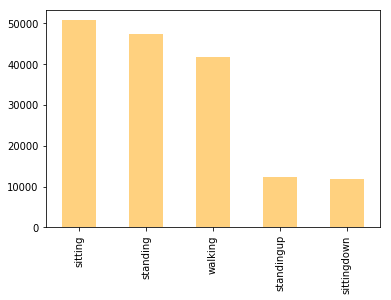

In [17]:
%matplotlib inline
raw_data['class'].value_counts().plot(kind='bar', color='orange', alpha=0.5)

In [18]:
# y - label 

y = raw_data['class'].copy()
type(y); y.describe(); y.head(3); y.shape; y.unique() # (165632, )

y = y.map({'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4})

In [19]:
raw_data.drop(labels=['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class'], axis=1, inplace=True); raw_data.shape 
raw_data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143


In [30]:
raw_data.to_csv('X.csv', index = None, header = True)

In [32]:
y.to_csv('Y.csv', index = None, header = None)

B:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
